In [202]:
# !pip install dash
# !pip install dash-bootstrap-components
# !pip install joblib
# !pip install mlflow
# !pip install xgboost
# !pip install seaborn
# !pip install imbalanced-learn
# !pip install python-dotenv
# !pip install matplotlib
# !pip install pandas
# !pip install scikit-learn
# !pip install pytest
# !pip install numpy

# EDA

In [203]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
import mlflow
import mlflow.sklearn
import itertools

In [204]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

# from xgboost import XGBRegressor

In [206]:
loaded_cars=pd.read_csv("Cars.csv", index_col=None)

In [207]:
loaded_cars.shape

(8128, 13)

In [208]:
loaded_cars.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [209]:
def carOwnerNumber(numStr):
  labels={"First Owner":1, "Second Owner":2, "Third Owner":3, "Fourth & Above Owner":4, "Test Drive Car":5}
  return labels[numStr]

loaded_cars['owner']=loaded_cars['owner'].apply(carOwnerNumber)
loaded_cars.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [210]:

print(loaded_cars.shape)
loaded_cars = loaded_cars.drop(loaded_cars[(loaded_cars['fuel'] == 'CNG') | (loaded_cars['fuel'] == 'LPG')].index)
print(loaded_cars.shape)
loaded_cars.head()


(8128, 13)
(8033, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [211]:
loaded_cars['mileage']=loaded_cars['mileage'].str.replace(' kmpl','').astype(float)
loaded_cars['engine']=loaded_cars['engine'].str.replace(' CC','').astype(float)
loaded_cars['max_power']=loaded_cars['max_power'].str.replace(' bhp','').astype(float)
loaded_cars['name']=loaded_cars['name'].str.split(" ").str[0]
loaded_cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [212]:
null_count=loaded_cars.isnull().sum()
null_count

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
torque           214
seats            214
dtype: int64

In [213]:
loaded_cars['mileage'] = loaded_cars['mileage'].fillna(loaded_cars['mileage'].median())
loaded_cars['engine'] = loaded_cars['engine'].fillna(loaded_cars['engine'].median())
loaded_cars['max_power'] = loaded_cars['max_power'].fillna(loaded_cars['max_power'].median())
loaded_cars['seats'] = loaded_cars['seats'].fillna(loaded_cars['seats'].median())


In [214]:
medians = {
    "year": loaded_cars['year'].median(),
    "mileage": loaded_cars['mileage'].median(),
    "max_power": loaded_cars['max_power'].median()
}
joblib.dump(medians, "medians.pkl")

['medians.pkl']

In [215]:
loaded_cars.drop(['torque'],axis=1,inplace=True)
loaded_cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [216]:
null_count=loaded_cars.isnull().sum()
null_count

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [217]:
unique_cars=loaded_cars['name'].unique()
print(len(unique_cars)," unique car names")
unique_cars

32  unique car names


array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [218]:
print(loaded_cars.shape)
loaded_cars.drop(loaded_cars[loaded_cars['owner']==5].index, inplace=True)
print(loaded_cars.shape)
loaded_cars.head()

(8033, 12)
(8028, 12)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [219]:
import seaborn as sns


In [220]:
loaded_cars.describe()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats
count,8028.000000,8.028000e+03,8.028000e+03,8028.000000,8028.000000,8028.000000,8028.000000,8028.000000
mean,2013.815521,6.403937e+05,6.977314e+04,1.458022,19.389510,1457.185725,91.575667,5.410314
std,4.030836,8.027015e+05,5.664419e+04,0.715283,3.948293,499.187790,35.369251,0.952623
min,1983.000000,2.999900e+04,1.000000e+03,1.000000,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.600000e+05,3.500000e+04,1.000000,16.800000,1197.000000,69.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,19.300000,1248.000000,82.400000,5.000000
75%,2017.000000,6.800000e+05,9.800000e+04,2.000000,22.100000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,4.000000,42.000000,3604.000000,400.000000,14.000000


In [221]:
sns.set_style(style="whitegrid")
plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

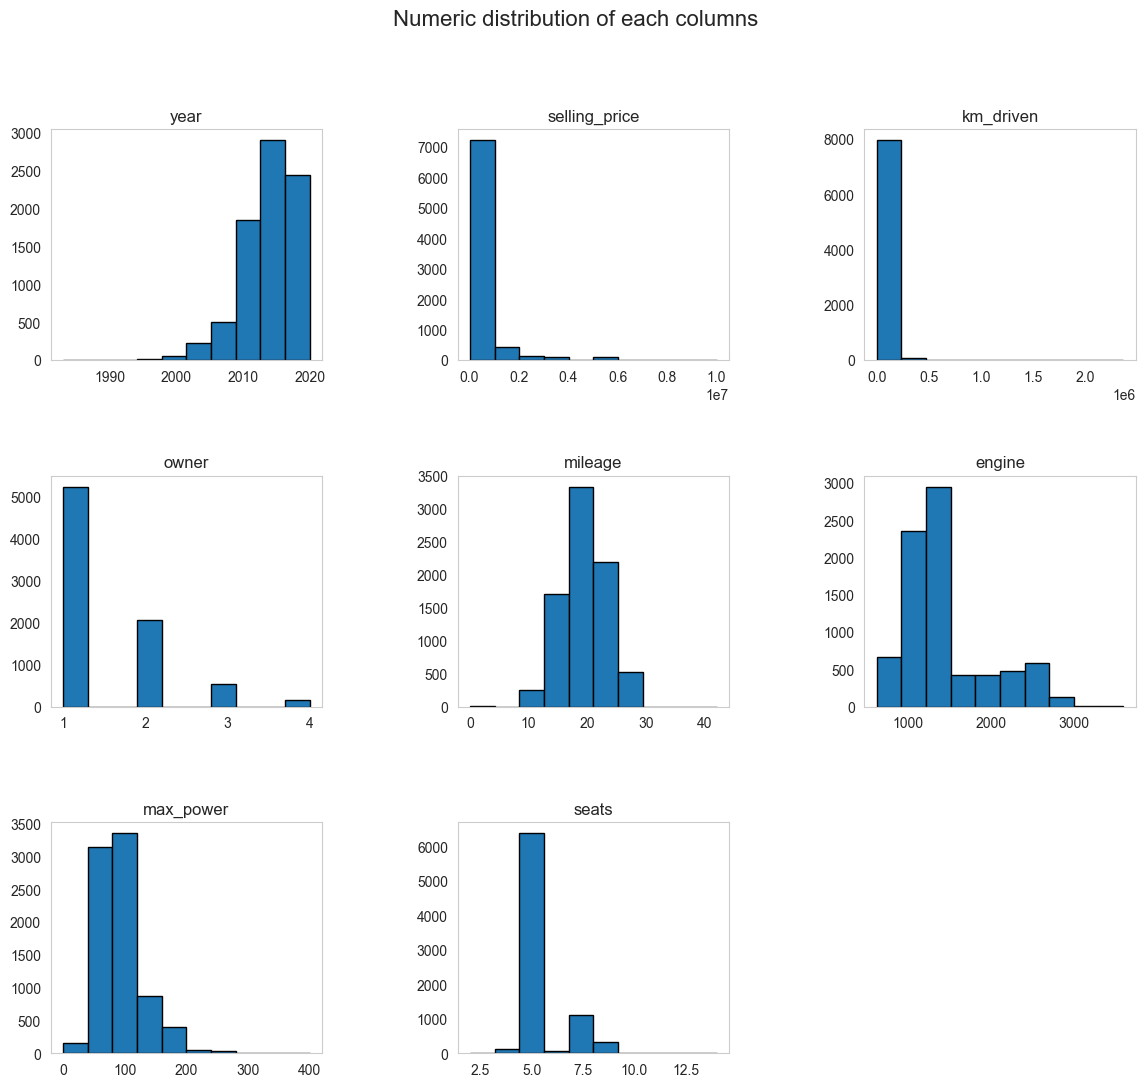

In [222]:
ax = loaded_cars.hist(figsize=(14, 12), edgecolor='black', grid=False)
plt.suptitle("Numeric distribution of each columns",fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [223]:
numeric_columns=loaded_cars.select_dtypes(include=['int','float']).columns
numeric_columns

Index(['year', 'selling_price', 'km_driven', 'owner', 'mileage', 'engine',
       'max_power', 'seats'],
      dtype='object')

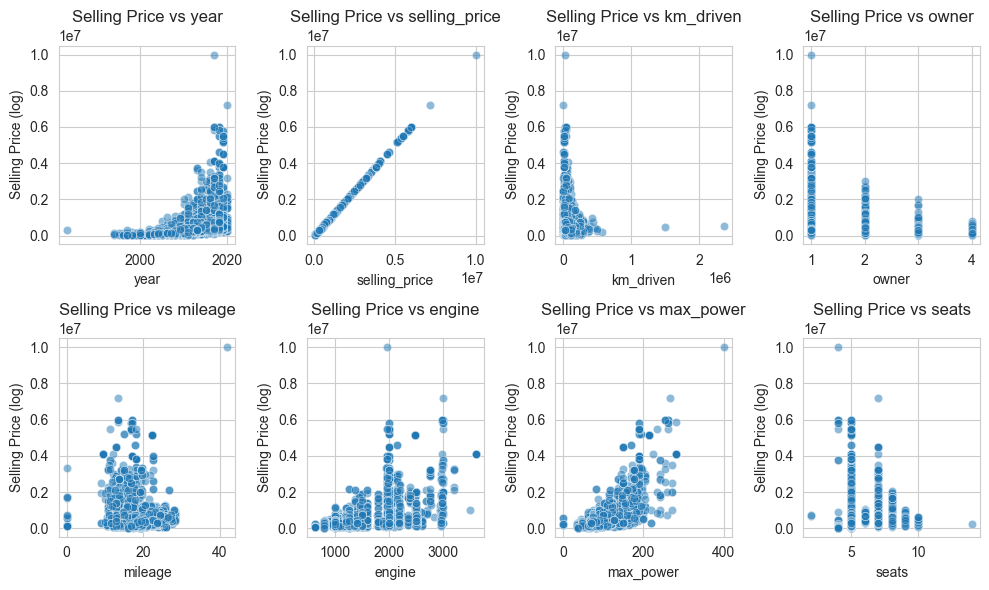

In [224]:
plt.figure(figsize=(10, 6))

for i, col in enumerate(numeric_columns, 1):

    plt.subplot(2, 4, i)
    sns.scatterplot(x=loaded_cars[col], y=loaded_cars["selling_price"], alpha=0.5)
    plt.title(f"Selling Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("Selling Price (log)")

plt.tight_layout()
plt.show()

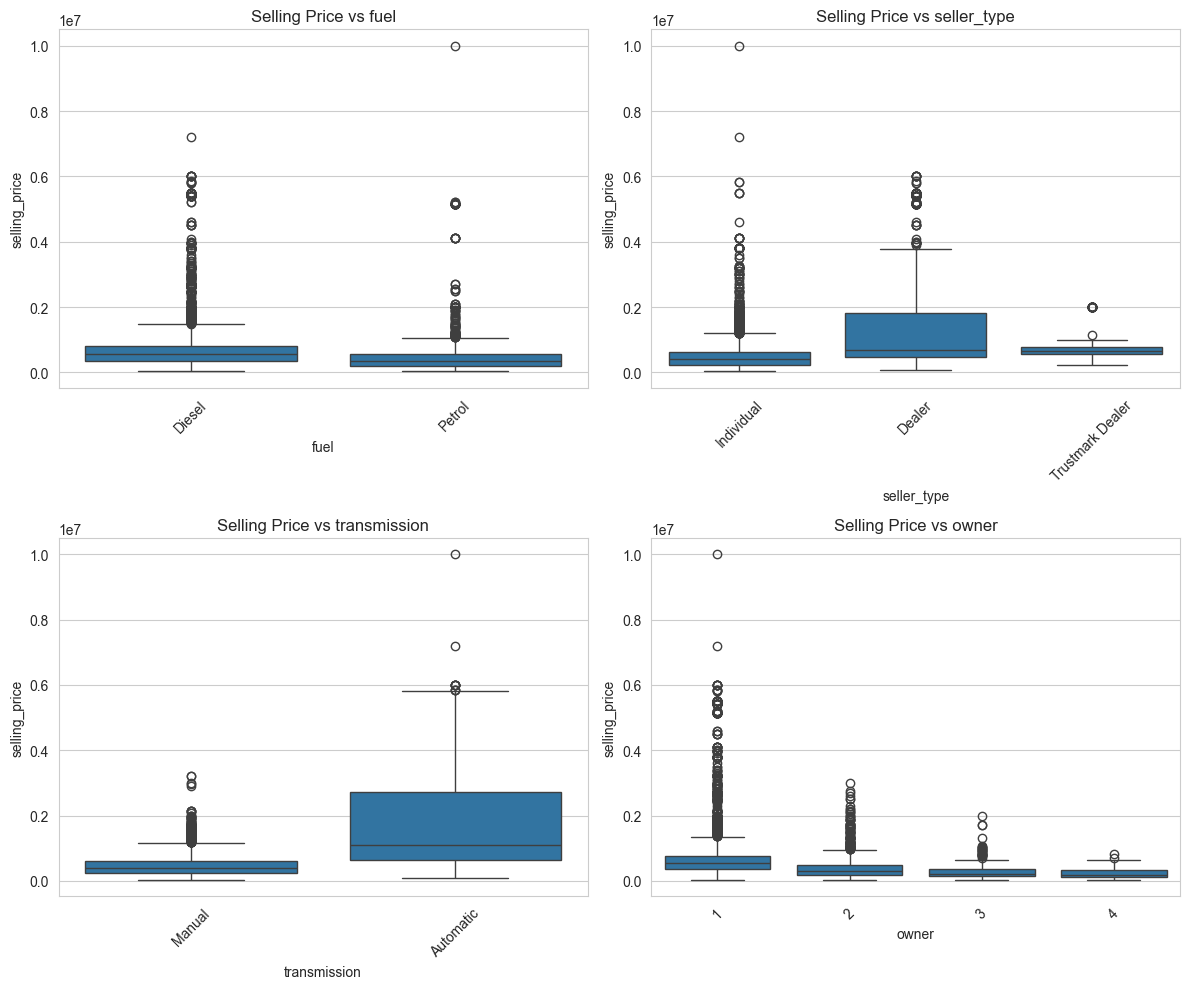

In [225]:
cat_features = ["fuel", "seller_type", "transmission", "owner"]

plt.figure(figsize=(12, 10))

for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=loaded_cars[col], y=loaded_cars["selling_price"])
    plt.title(f"Selling Price vs {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Axes: >

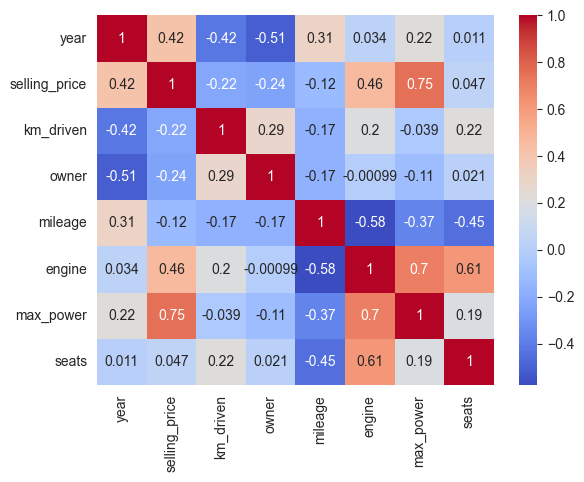

In [226]:
# loaded_cars[numeric_columns].corr()
sns.heatmap(loaded_cars[numeric_columns].corr(), annot=True, cmap="coolwarm")

In [227]:
# loaded_cars = pd.get_dummies(loaded_cars, columns=['fuel', 'transmission', 'seller_type'], drop_first=True)

# Training Segment

In [228]:

X = loaded_cars[['max_power','mileage','year']]

labels=[0,1,2,3]
max_selling_price=loaded_cars['selling_price'].max()
minimum_selling_price=loaded_cars['selling_price'].min()

#creating bins using np.linspace
bins=np.linspace(minimum_selling_price,max_selling_price+1,5) 

y = pd.qcut(loaded_cars['selling_price'], q=4, labels=labels) # seperating using quantiles 






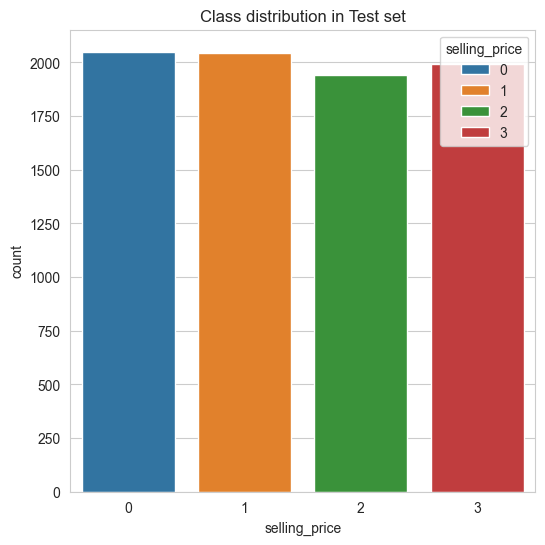

In [229]:
plt.figure(figsize=(6,6))
sns.countplot(x=y,hue=y)
plt.title("Class distribution in Test set")
plt.show()
plt.show()

In [230]:
# Normalize features
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
# X_train = X_train.values
# y_train = y_train.values

joblib.dump(scaler,'scaler_a3.pkl')

['scaler_a3.pkl']

In [231]:
# # Add intercept to X
# intercept = np.ones((X_train.shape[0], 1))
# X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
# intercept = np.ones((X_test.shape[0], 1))
# X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

In [232]:
# k=len(labels)
k=len(set(y))
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))

for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

In [233]:
# importances = grid_search.best_estimator_.feature_importances_
# feat_names = X.columns
# sns.barplot(x=importances, y=feat_names)
# plt.title("Feature Importances")
# plt.show()

In [234]:
X_train.shape,Y_train_encoded.shape

((6422, 3), (6422, 4))

In [235]:
import numpy as np
import matplotlib.pyplot as plt
import time

class MultinomialLogisticRegression:
    def __init__(self, n_classes, n_features, lr=0.01, max_iter=2000, 
                 method='batch', batch_frac=0.3, l2_lambda=0.0, verbose=False):
        """
        n_classes: number of target classes
        n_features: number of columns in X (including intercept)
        method: 'batch', 'minibatch', 'sto' (stochastic)
        l2_lambda: L2 regularization strength
        """
        self.k = n_classes
        self.n = n_features
        self.lr = lr
        self.max_iter = max_iter
        self.method = method
        self.batch_frac = batch_frac
        self.l2 = l2_lambda
        self.verbose = verbose
        self.W = np.random.randn(self.n, self.k) * 0.01
        self.losses = []

    # Core Computations
    def softmax(self, z):
        z_stable = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z_stable)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def h_theta(self, X):
        return self.softmax(X @ self.W)

    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X)
        eps = 1e-12
        ce_loss = -np.sum(Y * np.log(h + eps)) / m
        # L2 regularization (ignore intercept)
        W_no_intercept = self.W.copy()
        W_no_intercept[0, :] = 0.0
        l2_loss = 0.5 * (self.l2 / m) * np.sum(W_no_intercept**2)
        total_loss = ce_loss + l2_loss
        grad = (X.T @ (h - Y)) / m
        if self.l2 != 0:
            grad += (self.l2 / m) * W_no_intercept
        return total_loss, grad

    # Fit methods
    def fit(self, X, Y):
        m = X.shape[0]
        start_time = time.time()

        if self.method == "batch":
            for i in range(self.max_iter):
                loss, grad = self.gradient(X, Y)
                self.W -= self.lr * grad
                self.losses.append(loss)
                if self.verbose and i % 500 == 0:
                    print(f"[Batch] Iter {i}, Loss: {loss:.6f}")

        elif self.method == "minibatch":
            batch_size = max(1, int(self.batch_frac * m))
            for i in range(self.max_iter):
                ix = np.random.randint(0, m, batch_size)
                Xb, Yb = X[ix], Y[ix]
                loss, grad = self.gradient(Xb, Yb)
                self.W -= self.lr * grad
                self.losses.append(loss)
                if self.verbose and i % 500 == 0:
                    print(f"[MiniBatch] Iter {i}, Loss: {loss:.6f}")

        elif self.method == "sto":
            for i in range(self.max_iter):
                idx = np.random.randint(0, m)
                Xs = X[idx:idx+1]
                Ys = Y[idx:idx+1]
                loss, grad = self.gradient(Xs, Ys)
                self.W -= self.lr * grad
                self.losses.append(loss)
                if self.verbose and i % 1000 == 0:
                    print(f"[Stochastic] Iter {i}, Loss: {loss:.6f}")

        else:
            raise ValueError('Method must be "batch", "minibatch", or "sto".')

        print(f"Training completed in {time.time() - start_time:.2f}s")

    # Predictions & Evaluation
    def predict_proba(self, X):
        return self.h_theta(X)

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

    def plot_losses(self):
        plt.plot(np.arange(len(self.losses)), self.losses, label="Training Loss")
        plt.title("Loss Curve")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()


In [236]:
def classification_report_custom(y_true, y_pred):
    labels = np.unique(y_true)
    per_class = {}
    for label in labels:
        tp = np.sum((y_pred == label) & (y_true == label))
        fp = np.sum((y_pred == label) & (y_true != label))
        fn = np.sum((y_pred != label) & (y_true == label))

        precision = tp / (tp + fp + 1e-9)
        recall = tp / (tp + fn + 1e-9)
        f1 = 2 * precision * recall / (precision + recall + 1e-9)
        per_class[label] = {"precision": precision, "recall": recall, "f1": f1}

    # macro average
    macro = {k: np.mean([v[k] for v in per_class.values()]) for k in ["precision", "recall", "f1"]}

    # weighted average
    weights = [np.sum(y_true == label) for label in labels]
    total = np.sum(weights)
    weighted = {
        k: np.sum([v[k] * w for v, w in zip(per_class.values(), weights)]) / total
        for k in ["precision", "recall", "f1"]
    }

    return per_class, macro, weighted


[MiniBatch] Iter 0, Loss: 1.382306
[MiniBatch] Iter 500, Loss: 0.902297
[MiniBatch] Iter 1000, Loss: 0.880783
[MiniBatch] Iter 1500, Loss: 0.873091
[MiniBatch] Iter 2000, Loss: 0.895739
[MiniBatch] Iter 2500, Loss: 0.910166
Training completed in 0.98s


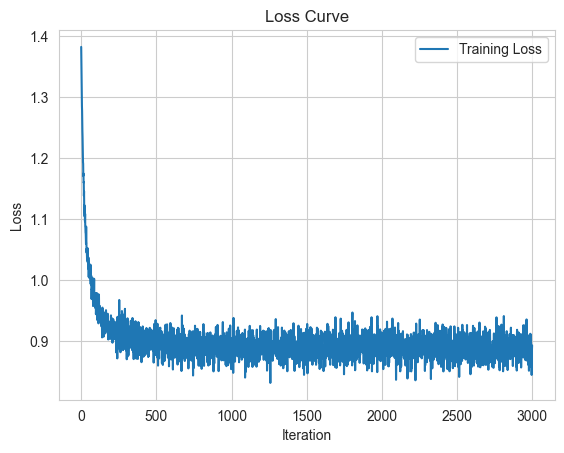


=== Custom Metrics (Test) ===
Accuracy: 0.5785

Class 0: precision=0.5873, recall=0.9439, f1=0.7240
Class 1: precision=0.5625, recall=0.1760, f1=0.2682
Class 2: precision=0.5022, recall=0.2905, f1=0.3681
Class 3: precision=0.6010, recall=0.8970, f1=0.7198

Macro Avg:
Precision=0.5632, Recall=0.5769, F1=0.5200

Weighted Avg:
Precision=0.5638, Recall=0.5785, F1=0.5207

=== Sklearn classification_report (Test) ===
              precision    recall  f1-score   support

           0     0.5873    0.9439    0.7240       410
           1     0.5625    0.1760    0.2682       409
           2     0.5022    0.2905    0.3681       389
           3     0.6010    0.8970    0.7198       398

    accuracy                         0.5785      1606
   macro avg     0.5632    0.5769    0.5200      1606
weighted avg     0.5638    0.5785    0.5207      1606

Confusion matrix:
 [[387  19   1   3]
 [206  72  82  49]
 [ 58  33 113 185]
 [  8   4  29 357]]


In [237]:
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train model
model = MultinomialLogisticRegression(
    n_features=n, 
    n_classes=k, 
    lr=0.1, 
    max_iter=3000, 
    method='minibatch', 
    batch_frac=0.25, 
    l2_lambda=1.0, 
    verbose=True
)
model.fit(X_train, Y_train_encoded)

# Predictions
yhat_train = model.predict(X_train)
yhat_test  = model.predict(X_test)

# Plot training loss curve
model.plot_losses()


# Custom Evaluation
def accuracy_score_custom(y_true, y_pred):
    return np.mean(y_true == y_pred)

acc = accuracy_score_custom(y_test, yhat_test)
per_class, macro, weighted = classification_report_custom(y_test, yhat_test)

print("\n=== Custom Metrics (Test) ===")
print(f"Accuracy: {acc:.4f}\n")

for c, metrics in per_class.items():
    print(f"Class {c}: "
          f"precision={metrics['precision']:.4f}, "
          f"recall={metrics['recall']:.4f}, "
          f"f1={metrics['f1']:.4f}")

print("\nMacro Avg:")
print(f"Precision={macro['precision']:.4f}, Recall={macro['recall']:.4f}, F1={macro['f1']:.4f}")

print("\nWeighted Avg:")
print(f"Precision={weighted['precision']:.4f}, Recall={weighted['recall']:.4f}, F1={weighted['f1']:.4f}")

# Sklearn Comparison
print("\n=== Sklearn classification_report (Test) ===")
print(classification_report(y_test, yhat_test, digits=4))

# Confusion Matrix
print("Confusion matrix:\n", confusion_matrix(y_test, yhat_test))


In [238]:
from dotenv import load_dotenv
import os
# Load environment variables
load_dotenv()

# Get them safely
mlflow.set_tracking_uri(os.getenv("MLFLOW_TRACKING_URI"))

if os.getenv("MLFLOW_TRACKING_TOKEN"):
    os.environ["MLFLOW_TRACKING_TOKEN"] = os.getenv("MLFLOW_TRACKING_TOKEN")
else:
    os.environ["MLFLOW_TRACKING_USERNAME"] = os.getenv("MLFLOW_TRACKING_USERNAME")
    os.environ["MLFLOW_TRACKING_PASSWORD"] = os.getenv("MLFLOW_TRACKING_PASSWORD")

mlflow.set_experiment("st126522-a3")
# !pip install python-dotenv

<Experiment: artifact_location='mlflow-artifacts:/780011026393011254', creation_time=1759581683531, experiment_id='780011026393011254', last_update_time=1759581683531, lifecycle_stage='active', name='st126522-a3', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [239]:
client = mlflow.tracking.MlflowClient()
# observing model version status in MLflow
for mv in client.search_model_versions("name='st126522-a3-model'"):
    print(f"Version {mv.version} | Stage: {mv.current_stage} | Status: {mv.status}")

Version 7 | Stage: None | Status: READY
Version 6 | Stage: None | Status: READY
Version 5 | Stage: None | Status: READY
Version 4 | Stage: None | Status: READY
Version 3 | Stage: None | Status: READY
Version 2 | Stage: None | Status: READY
Version 1 | Stage: None | Status: READY


In [ ]:
from train_best_model import train_and_register_best_model


best_model, best_run_id = train_and_register_best_model(X_train, Y_train_encoded, X_test, y_test)

# Construct model URI for the best run
model_uri = f"runs:/{best_run_id}/model"

# Load the model
loaded_model = mlflow.pyfunc.load_model(model_uri)

# You can now use loaded_model.predict
y_pred = loaded_model.predict([[2025, 400, 222,1]])  # Example input # 1 for intercept for now

# Car Price Quantile Classification — Model Training Report

## 1. Objective
The goal of this project is to **predict the price range (quantile class)** of a car based on its features such as manufacturing year, mileage, and max power.  
Instead of regressing exact prices, we treat this as a **multi-class classification** problem by categorizing prices into quantile-based bins (bottom 25%, lower-mid, upper-mid, and top 25%).

## 2. Why Quantile Cuts Instead of Min–Max Scaling
Using **quantile-based cuts** allows for **balanced segmentation** of the target variable (selling price), compared to using arbitrary or min–max intervals.

### 🔹 Advantages of Quantile Cuts:
- Ensures **roughly equal number of samples per class**, reducing imbalance issues.  
- Makes each class statistically meaningful (e.g., bottom quartile vs. top quartile).  
- Reflects **relative market positioning** rather than absolute price differences.

If min–max cuts were used, classes near the tail of the price distribution (e.g., luxury cars) would be **severely underrepresented** (just 1 value), harming generalization.


## 3. Data Distribution and Class Balance

Below is a visualization of the **original selling price distribution** and the resulting **quantile-based class distribution**.

- **Histogram of Selling Prices:**  
  ![Histogram](../selling_price_hist.png)

  Since the data is right skewed, there will be less classes for expensive cars, if min max scaling is used. Hence quantiles are used for equal number of class representatives.

- **Bar Plot of Quantile Classes:**  
  ![image-2.png](../class_distribution.png)

  The quantile approach ensures that each class (0–3) has a more balanced representation, which helps the logistic model converge better and avoid bias toward dominant classes. Aditionally, stratify parameter is also used in train test split to create equal density for both train and test for all classes.

## 4. Experimental Setup

### 4.1 Model
A **Multinomial Logistic Regression** model was implemented from scratch with support for:
- Mini-batch Gradient Descent  
- Stochastic Gradient Descent (SGD)  
- L2 Regularization (Ridge)  

This design provides flexibility in controlling **learning dynamics** and **overfitting behavior**.

### 4.2 Feature Set
| Feature | Description |
|----------|--------------|
| `Year` | Year of manufacture |
| `Mileage` | Fuel efficiency (km/l) |
| `Max Power` | Maximum power output (bhp) |

All input features were **scaled** using standardization (mean & variance normalization).

## 5. Hyperparameter Tuning

A small grid search was performed using the following configuration:

| Parameter | Values Tested |
|------------|----------------|
| Learning Rate (`lr`) | `[0.01, 0.05, 0.1]` |
| Ridge Regularization (`λ`) | `[0.0, 1.0, 0.5]` |
| Optimization Method | `["minibatch", "sto", "batch"]` |
| Max Iterations | `4000` |

### Number of Experimental Runs:
Total runs = len(learning_rates) × len(ridge_values) × len(methods)
= 3 × 3 × 3
= 27 total runs


## 6. Evaluation Metrics

Since the task involves multi-class prediction with potential imbalance, the following metrics were used:

| Metric | Description |
|---------|--------------|
| **Accuracy** | Overall correctness of predictions |
| **Macro F1** | Equal-weighted F1 across all classes (robust to imbalance) |
| **Weighted F1** | Class-frequency-weighted average of F1 |
| **Per-Class F1** | To assess model fairness across price ranges |

These metrics were logged to MLflow for each experimental run. 

Accuracy works pretty well for well balanced classes in data. But F1 macro is still chosen over Accuracy as it is generally good overall.

## 7. Best Model Selection

After all runs, the model with the **highest Macro F1-score** was selected as the best performer:

- Registered under model name: `st126522-a3-model`
- Best run identified by **RUN_ID** stored in `.env`

MODEL_NAME = "st126522-a3-model"
RUN_ID = "f54acb17921448078444dd4d559e1880"

![image-2.png](../metrics.png)